In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [4]:
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
df = df.drop("Email No.", axis=1)

In [6]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [8]:
from sklearn.model_selection import train_test_split
X=df.drop('Prediction', axis=1)
y=df['Prediction']
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
y_pred = neigh.predict(X_test)

In [13]:
neigh.score(X_train, y_train)
neigh.score(X_test, y_test)

0.8927536231884058

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[716,  42],
       [ 69, 208]], dtype=int64)

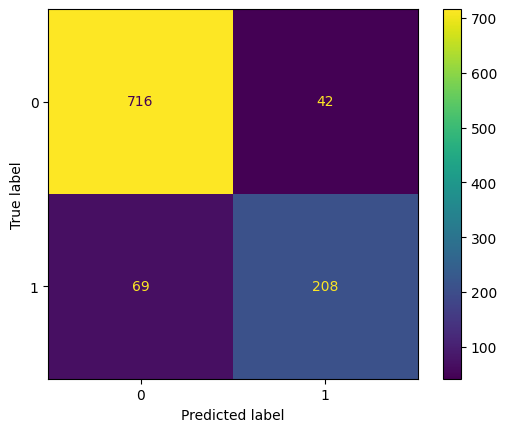

In [16]:
mlt = ConfusionMatrixDisplay(confusion_matrix=cm)
mlt.plot()
plt.show()

In [18]:
from sklearn.svm import SVC
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [22]:
y_pred = svm.predict(X_test)

In [23]:
svm.score(X_train, y_train)
svm.score(X_test, y_test)

0.9101449275362319

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[732,  26],
       [ 67, 210]], dtype=int64)

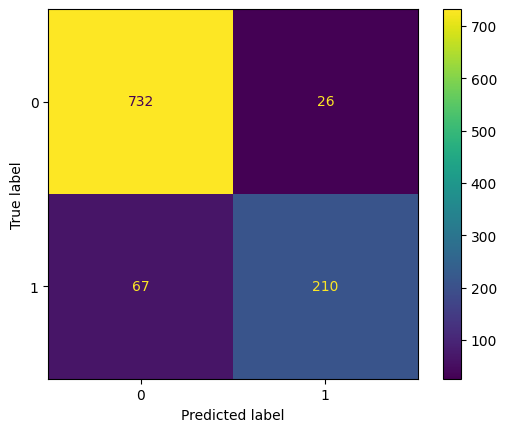

In [26]:
mlt = ConfusionMatrixDisplay(confusion_matrix=cm)
mlt.plot()
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       758
           1       0.89      0.76      0.82       277

    accuracy                           0.91      1035
   macro avg       0.90      0.86      0.88      1035
weighted avg       0.91      0.91      0.91      1035

